In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv("dataset/train.csv")
df.head()

,customer_id,Name,age,gender,security_no,region_category,membership_category,joining_date,joined_through_referral,referral_id,...,avg_time_spent,avg_transaction_value,avg_frequency_login_days,points_in_wallet,used_special_discount,offer_application_preference,past_complaint,complaint_status,feedback,churn_risk_score
0,fffe4300490044003600300030003800,Pattie Morrisey,18,F,XW0DQ7H,Village,Platinum Membership,2017-08-17,No,xxxxxxxx,...,300.63,53005.25,17.0,781.75,Yes,Yes,No,Not Applicable,Products always in Stock,2
1,fffe43004900440032003100300035003700,Traci Peery,32,F,5K0N3X1,City,Premium Membership,2017-08-28,?,CID21329,...,306.34,12838.38,10.0,NaN,Yes,No,Yes,Solved,Quality Customer Care,1
2,fffe4300490044003100390032003600,Merideth Mcmeen,44,F,1F2TCL3,Town,No Membership,2016-11-11,Yes,CID12313,...,516.16,21027.00,22.0,500.69,No,Yes,Yes,Solved in Follow-up,Poor Website,5
3,fffe43004900440036003000330031003600,Eufemia Cardwell,37,M,VJGJ33N,City,No Membership,2016-10-29,Yes,CID3793,...,53.27,25239.56,6.0,567.66,No,Yes,Yes,Unsolved,Poor Website,5
4,fffe43004900440031003900350030003600,Meghan Kosak,31,F,SVZXCWB,City,No Membership,2017-09-12,No,xxxxxxxx,...,113.13,24483.66,16.0,663.06,No,Yes,Yes,Solved,Poor Website,5


In [3]:
df.shape

(36992, 25)

In [4]:
df.describe()

,age,days_since_last_login,avg_time_spent,avg_transaction_value,points_in_wallet,churn_risk_score
count,36992.000000,36992.000000,36992.000000,36992.000000,33549.000000,36992.000000
mean,37.118161,-41.915576,243.472334,29271.194003,686.882199,3.463397
std,15.867412,228.819900,398.289149,19444.806226,194.063624,1.409661
min,10.000000,-999.000000,-2814.109110,800.460000,-760.661236,-1.000000
25%,23.000000,8.000000,60.102500,14177.540000,616.150000,3.000000
50%,37.000000,12.000000,161.765000,27554.485000,697.620000,4.000000
75%,51.000000,16.000000,356.515000,40855.110000,763.950000,5.000000
max,64.000000,26.000000,3235.578521,99914.050000,2069.069761,5.000000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36992 entries, 0 to 36991
Data columns (total 25 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   customer_id                   36992 non-null  object 
 1   Name                          36992 non-null  object 
 2   age                           36992 non-null  int64  
 3   gender                        36992 non-null  object 
 4   security_no                   36992 non-null  object 
 5   region_category               31564 non-null  object 
 6   membership_category           36992 non-null  object 
 7   joining_date                  36992 non-null  object 
 8   joined_through_referral       36992 non-null  object 
 9   referral_id                   36992 non-null  object 
 10  preferred_offer_types         36704 non-null  object 
 11  medium_of_operation           36992 non-null  object 
 12  internet_option               36992 non-null  object 
 13  l

In [6]:
df.isnull().sum()

customer_id                        0
Name                               0
age                                0
gender                             0
security_no                        0
region_category                 5428
membership_category                0
joining_date                       0
joined_through_referral            0
referral_id                        0
preferred_offer_types            288
medium_of_operation                0
internet_option                    0
last_visit_time                    0
days_since_last_login              0
avg_time_spent                     0
avg_transaction_value              0
avg_frequency_login_days           0
points_in_wallet                3443
used_special_discount              0
offer_application_preference       0
past_complaint                     0
complaint_status                   0
feedback                           0
churn_risk_score                   0
dtype: int64

In [7]:
df.columns

Index(['customer_id', 'Name', 'age', 'gender', 'security_no',
       'region_category', 'membership_category', 'joining_date',
       'joined_through_referral', 'referral_id', 'preferred_offer_types',
       'medium_of_operation', 'internet_option', 'last_visit_time',
       'days_since_last_login', 'avg_time_spent', 'avg_transaction_value',
       'avg_frequency_login_days', 'points_in_wallet', 'used_special_discount',
       'offer_application_preference', 'past_complaint', 'complaint_status',
       'feedback', 'churn_risk_score'],
      dtype='object')

In [8]:
type(df['Name'])

pandas.core.series.Series

In [9]:
df['Name']

0         Pattie Morrisey
1             Traci Peery
2         Merideth Mcmeen
3        Eufemia Cardwell
4            Meghan Kosak
               ...       
36987            Cuc Tarr
36988      Jenni Stronach
36989       Luciana Kinch
36990       Tawana Ardoin
36991    Verlene Beaulieu
Name: Name, Length: 36992, dtype: object

In [10]:
df[['Name', 'internet_option']]

,Name,internet_option
0,Pattie Morrisey,Wi-Fi
1,Traci Peery,Mobile_Data
2,Merideth Mcmeen,Wi-Fi
3,Eufemia Cardwell,Mobile_Data
4,Meghan Kosak,Mobile_Data
...,...,...
36987,Cuc Tarr,Wi-Fi
36988,Jenni Stronach,Wi-Fi
36989,Luciana Kinch,Wi-Fi
36990,Tawana Ardoin,Mobile_Data


In [11]:
df.internet_option.value_counts()

internet_option
Wi-Fi          12413
Mobile_Data    12343
Fiber_Optic    12236
Name: count, dtype: int64

In [12]:
df['internet_option'].value_counts()

internet_option
Wi-Fi          12413
Mobile_Data    12343
Fiber_Optic    12236
Name: count, dtype: int64

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36992 entries, 0 to 36991
Data columns (total 25 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   customer_id                   36992 non-null  object 
 1   Name                          36992 non-null  object 
 2   age                           36992 non-null  int64  
 3   gender                        36992 non-null  object 
 4   security_no                   36992 non-null  object 
 5   region_category               31564 non-null  object 
 6   membership_category           36992 non-null  object 
 7   joining_date                  36992 non-null  object 
 8   joined_through_referral       36992 non-null  object 
 9   referral_id                   36992 non-null  object 
 10  preferred_offer_types         36704 non-null  object 
 11  medium_of_operation           36992 non-null  object 
 12  internet_option               36992 non-null  object 
 13  l

In [14]:
df.region_category.mode()[0]

'Town'

In [15]:
df['region_category']= df['region_category'].fillna(df['region_category'].mode()[0])
df['preferred_offer_types']= df['preferred_offer_types'].fillna(df['preferred_offer_types'].mode()[0])

In [16]:
df['points_in_wallet']= df['points_in_wallet'].fillna(df['points_in_wallet'].mean())

In [17]:
df.isnull().sum()

customer_id                     0
Name                            0
age                             0
gender                          0
security_no                     0
region_category                 0
membership_category             0
joining_date                    0
joined_through_referral         0
referral_id                     0
preferred_offer_types           0
medium_of_operation             0
internet_option                 0
last_visit_time                 0
days_since_last_login           0
avg_time_spent                  0
avg_transaction_value           0
avg_frequency_login_days        0
points_in_wallet                0
used_special_discount           0
offer_application_preference    0
past_complaint                  0
complaint_status                0
feedback                        0
churn_risk_score                0
dtype: int64

In [18]:
df.describe()

,age,days_since_last_login,avg_time_spent,avg_transaction_value,points_in_wallet,churn_risk_score
count,36992.000000,36992.000000,36992.000000,36992.000000,36992.000000,36992.000000
mean,37.118161,-41.915576,243.472334,29271.194003,686.882199,3.463397
std,15.867412,228.819900,398.289149,19444.806226,184.811682,1.409661
min,10.000000,-999.000000,-2814.109110,800.460000,-760.661236,-1.000000
25%,23.000000,8.000000,60.102500,14177.540000,624.350000,3.000000
50%,37.000000,12.000000,161.765000,27554.485000,686.882199,4.000000
75%,51.000000,16.000000,356.515000,40855.110000,757.002500,5.000000
max,64.000000,26.000000,3235.578521,99914.050000,2069.069761,5.000000


In [19]:
df.head()

,customer_id,Name,age,gender,security_no,region_category,membership_category,joining_date,joined_through_referral,referral_id,...,avg_time_spent,avg_transaction_value,avg_frequency_login_days,points_in_wallet,used_special_discount,offer_application_preference,past_complaint,complaint_status,feedback,churn_risk_score
0,fffe4300490044003600300030003800,Pattie Morrisey,18,F,XW0DQ7H,Village,Platinum Membership,2017-08-17,No,xxxxxxxx,...,300.63,53005.25,17.0,781.750000,Yes,Yes,No,Not Applicable,Products always in Stock,2
1,fffe43004900440032003100300035003700,Traci Peery,32,F,5K0N3X1,City,Premium Membership,2017-08-28,?,CID21329,...,306.34,12838.38,10.0,686.882199,Yes,No,Yes,Solved,Quality Customer Care,1
2,fffe4300490044003100390032003600,Merideth Mcmeen,44,F,1F2TCL3,Town,No Membership,2016-11-11,Yes,CID12313,...,516.16,21027.00,22.0,500.690000,No,Yes,Yes,Solved in Follow-up,Poor Website,5
3,fffe43004900440036003000330031003600,Eufemia Cardwell,37,M,VJGJ33N,City,No Membership,2016-10-29,Yes,CID3793,...,53.27,25239.56,6.0,567.660000,No,Yes,Yes,Unsolved,Poor Website,5
4,fffe43004900440031003900350030003600,Meghan Kosak,31,F,SVZXCWB,City,No Membership,2017-09-12,No,xxxxxxxx,...,113.13,24483.66,16.0,663.060000,No,Yes,Yes,Solved,Poor Website,5


In [21]:
!pip install pandas-profiling

In [25]:
from pandas_profiling import ProfileReport
profile = ProfileReport(df)
profile.to_file(output_file="churn.html")

C:\Users\KIIT\AppData\Local\Temp\ipykernel_4108\751084274.py:1: DeprecationWarning: `import pandas_profiling` is going to be deprecated by April 1st. Please use `import ydata_profiling` instead.
  from pandas_profiling import ProfileReport
C:\Users\KIIT\anaconda3\Lib\site-packages\ydata_profiling\profile_report.py:363: UserWarning: Try running command: 'pip install --upgrade Pillow' to avoid ValueError
  warnings.warn(


Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

In [20]:
df[['complaint_status', 'past_complaint']].head()

,complaint_status,past_complaint
0,Not Applicable,No
1,Solved,Yes
2,Solved in Follow-up,Yes
3,Unsolved,Yes
4,Solved,Yes


In [21]:
df.columns

Index(['customer_id', 'Name', 'age', 'gender', 'security_no',
       'region_category', 'membership_category', 'joining_date',
       'joined_through_referral', 'referral_id', 'preferred_offer_types',
       'medium_of_operation', 'internet_option', 'last_visit_time',
       'days_since_last_login', 'avg_time_spent', 'avg_transaction_value',
       'avg_frequency_login_days', 'points_in_wallet', 'used_special_discount',
       'offer_application_preference', 'past_complaint', 'complaint_status',
       'feedback', 'churn_risk_score'],
      dtype='object')

In [22]:
df.drop('complaint_status', axis=1, inplace=True)

In [23]:
df.columns

Index(['customer_id', 'Name', 'age', 'gender', 'security_no',
       'region_category', 'membership_category', 'joining_date',
       'joined_through_referral', 'referral_id', 'preferred_offer_types',
       'medium_of_operation', 'internet_option', 'last_visit_time',
       'days_since_last_login', 'avg_time_spent', 'avg_transaction_value',
       'avg_frequency_login_days', 'points_in_wallet', 'used_special_discount',
       'offer_application_preference', 'past_complaint', 'feedback',
       'churn_risk_score'],
      dtype='object')

In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36992 entries, 0 to 36991
Data columns (total 24 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   customer_id                   36992 non-null  object 
 1   Name                          36992 non-null  object 
 2   age                           36992 non-null  int64  
 3   gender                        36992 non-null  object 
 4   security_no                   36992 non-null  object 
 5   region_category               36992 non-null  object 
 6   membership_category           36992 non-null  object 
 7   joining_date                  36992 non-null  object 
 8   joined_through_referral       36992 non-null  object 
 9   referral_id                   36992 non-null  object 
 10  preferred_offer_types         36992 non-null  object 
 11  medium_of_operation           36992 non-null  object 
 12  internet_option               36992 non-null  object 
 13  l

In [25]:
df1 = df[['age', 'days_since_last_login', 'avg_time_spent', 'avg_transaction_value', 'points_in_wallet', 'churn_risk_score']]

In [26]:
df1.head()

,age,days_since_last_login,avg_time_spent,avg_transaction_value,points_in_wallet,churn_risk_score
0,18,17,300.63,53005.25,781.750000,2
1,32,16,306.34,12838.38,686.882199,1
2,44,14,516.16,21027.00,500.690000,5
3,37,11,53.27,25239.56,567.660000,5
4,31,20,113.13,24483.66,663.060000,5


C:\Users\KIIT\AppData\Local\Temp\ipykernel_21020\784950395.py:8: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df1[column])
C:\Users\KIIT\AppData\Local\Temp\ipykernel_21020\784950395.py:8: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df1[column])
C:\Users\KIIT\AppData\Local\Temp\ipykernel_21020

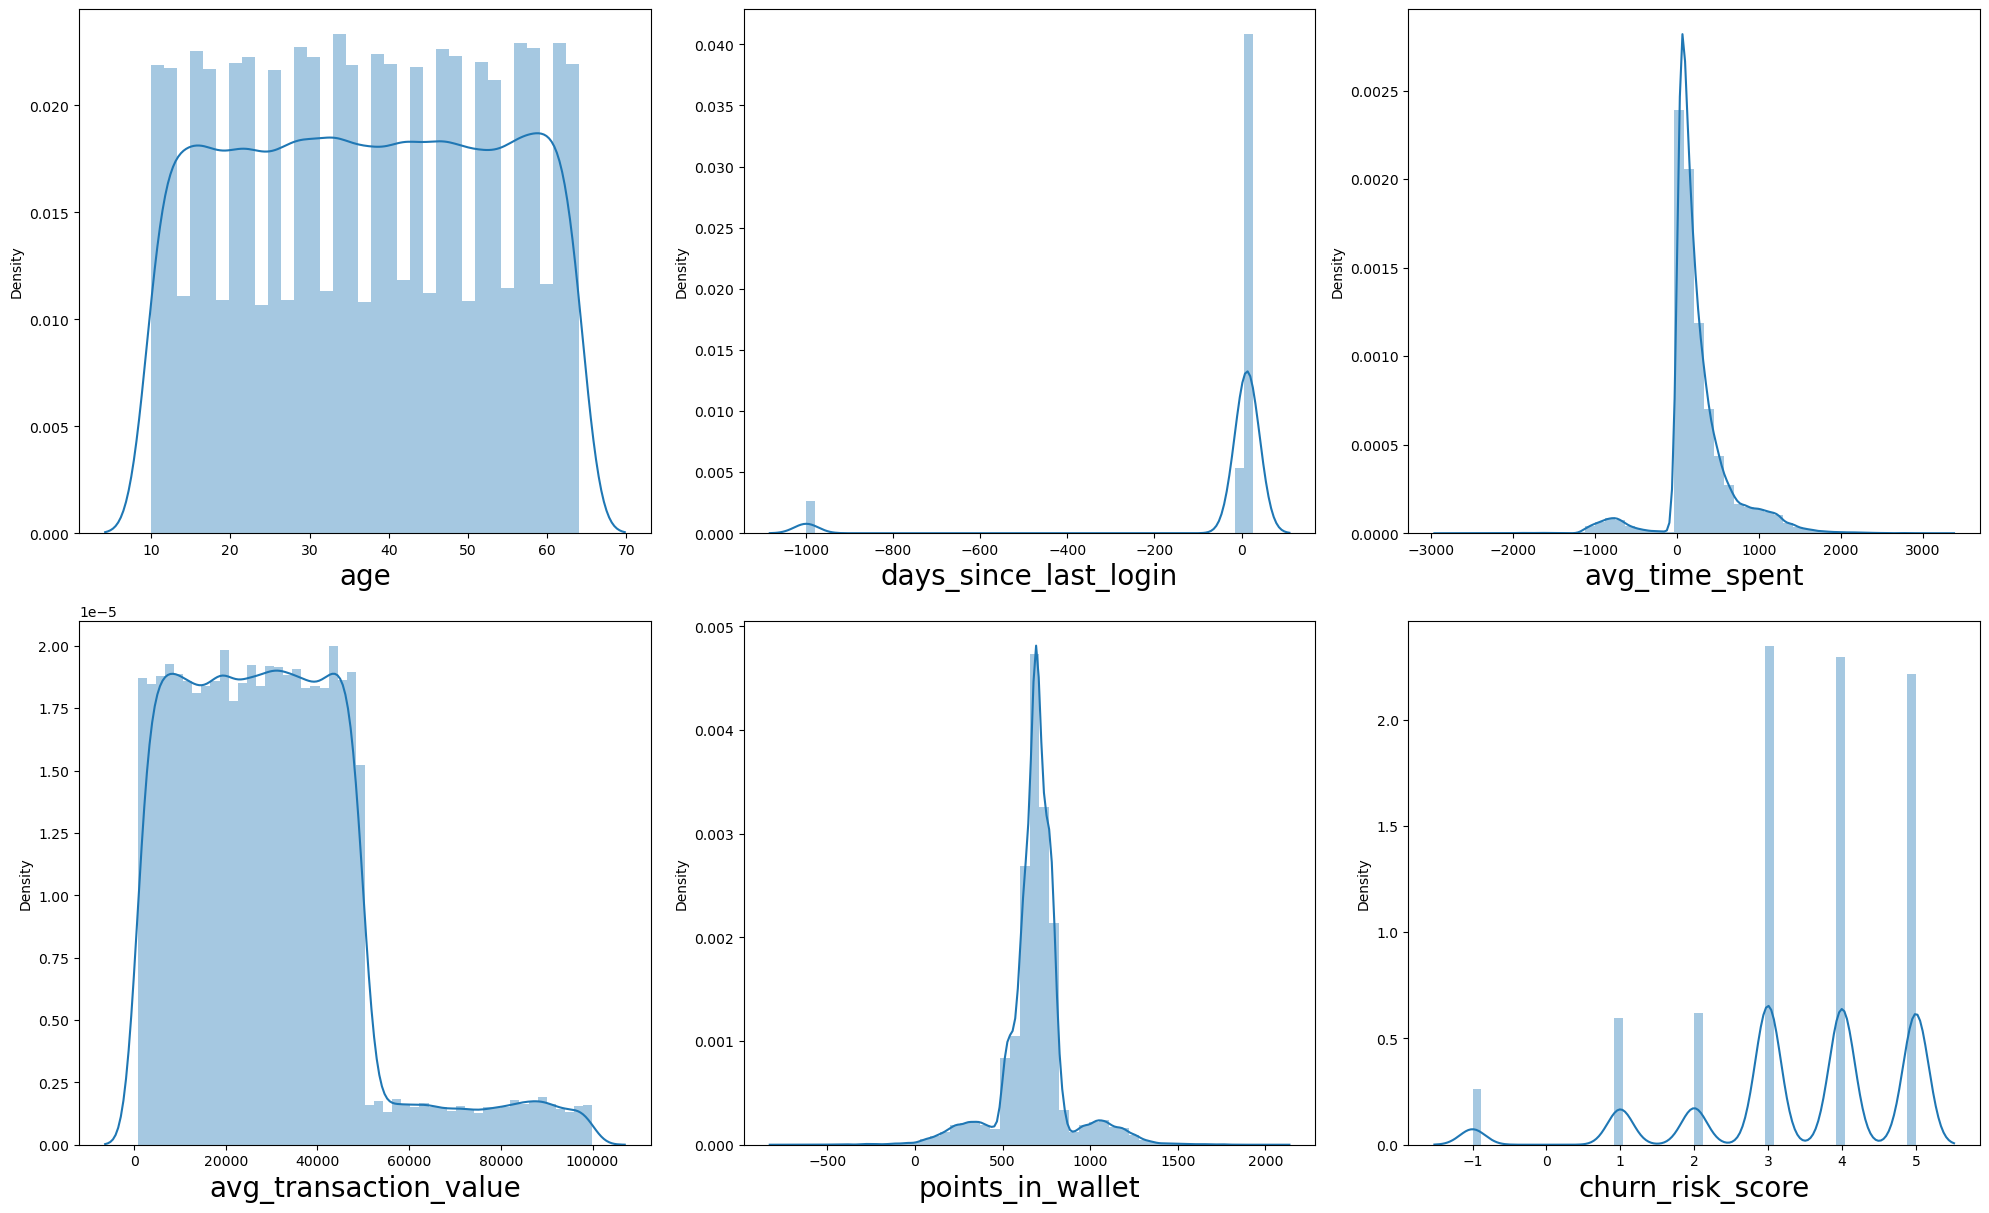

In [27]:
import seaborn as sns
plt.figure(figsize=(20,30), facecolor='white')
plotnumber=1

for column in df1:
    if plotnumber<=15:
        ax = plt.subplot(5,3,plotnumber)
        sns.distplot(df1[column])
        plt.xlabel(column, fontsize=20)
        
    plotnumber+=1
plt.tight_layout()

In [28]:
df.head()

,customer_id,Name,age,gender,security_no,region_category,membership_category,joining_date,joined_through_referral,referral_id,...,days_since_last_login,avg_time_spent,avg_transaction_value,avg_frequency_login_days,points_in_wallet,used_special_discount,offer_application_preference,past_complaint,feedback,churn_risk_score
0,fffe4300490044003600300030003800,Pattie Morrisey,18,F,XW0DQ7H,Village,Platinum Membership,2017-08-17,No,xxxxxxxx,...,17,300.63,53005.25,17.0,781.750000,Yes,Yes,No,Products always in Stock,2
1,fffe43004900440032003100300035003700,Traci Peery,32,F,5K0N3X1,City,Premium Membership,2017-08-28,?,CID21329,...,16,306.34,12838.38,10.0,686.882199,Yes,No,Yes,Quality Customer Care,1
2,fffe4300490044003100390032003600,Merideth Mcmeen,44,F,1F2TCL3,Town,No Membership,2016-11-11,Yes,CID12313,...,14,516.16,21027.00,22.0,500.690000,No,Yes,Yes,Poor Website,5
3,fffe43004900440036003000330031003600,Eufemia Cardwell,37,M,VJGJ33N,City,No Membership,2016-10-29,Yes,CID3793,...,11,53.27,25239.56,6.0,567.660000,No,Yes,Yes,Poor Website,5
4,fffe43004900440031003900350030003600,Meghan Kosak,31,F,SVZXCWB,City,No Membership,2017-09-12,No,xxxxxxxx,...,20,113.13,24483.66,16.0,663.060000,No,Yes,Yes,Poor Website,5


In [29]:
df[['joining_date']].head()

,joining_date
0,2017-08-17
1,2017-08-28
2,2016-11-11
3,2016-10-29
4,2017-09-12


In [30]:
df['joining_day'] = pd.to_datetime(df.joining_date, format="%Y-%m-%d").dt.day
df['joining_month'] = pd.to_datetime(df.joining_date, format="%Y-%m-%d").dt.month
df['joining_year'] = pd.to_datetime(df.joining_date, format="%Y-%m-%d").dt.year

In [31]:
df.head()

,customer_id,Name,age,gender,security_no,region_category,membership_category,joining_date,joined_through_referral,referral_id,...,avg_frequency_login_days,points_in_wallet,used_special_discount,offer_application_preference,past_complaint,feedback,churn_risk_score,joining_day,joining_month,joining_year
0,fffe4300490044003600300030003800,Pattie Morrisey,18,F,XW0DQ7H,Village,Platinum Membership,2017-08-17,No,xxxxxxxx,...,17.0,781.750000,Yes,Yes,No,Products always in Stock,2,17,8,2017
1,fffe43004900440032003100300035003700,Traci Peery,32,F,5K0N3X1,City,Premium Membership,2017-08-28,?,CID21329,...,10.0,686.882199,Yes,No,Yes,Quality Customer Care,1,28,8,2017
2,fffe4300490044003100390032003600,Merideth Mcmeen,44,F,1F2TCL3,Town,No Membership,2016-11-11,Yes,CID12313,...,22.0,500.690000,No,Yes,Yes,Poor Website,5,11,11,2016
3,fffe43004900440036003000330031003600,Eufemia Cardwell,37,M,VJGJ33N,City,No Membership,2016-10-29,Yes,CID3793,...,6.0,567.660000,No,Yes,Yes,Poor Website,5,29,10,2016
4,fffe43004900440031003900350030003600,Meghan Kosak,31,F,SVZXCWB,City,No Membership,2017-09-12,No,xxxxxxxx,...,16.0,663.060000,No,Yes,Yes,Poor Website,5,12,9,2017


In [32]:
df.drop(["joining_date"], axis=1, inplace=True)

In [33]:
df.head()

,customer_id,Name,age,gender,security_no,region_category,membership_category,joined_through_referral,referral_id,preferred_offer_types,...,avg_frequency_login_days,points_in_wallet,used_special_discount,offer_application_preference,past_complaint,feedback,churn_risk_score,joining_day,joining_month,joining_year
0,fffe4300490044003600300030003800,Pattie Morrisey,18,F,XW0DQ7H,Village,Platinum Membership,No,xxxxxxxx,Gift Vouchers/Coupons,...,17.0,781.750000,Yes,Yes,No,Products always in Stock,2,17,8,2017
1,fffe43004900440032003100300035003700,Traci Peery,32,F,5K0N3X1,City,Premium Membership,?,CID21329,Gift Vouchers/Coupons,...,10.0,686.882199,Yes,No,Yes,Quality Customer Care,1,28,8,2017
2,fffe4300490044003100390032003600,Merideth Mcmeen,44,F,1F2TCL3,Town,No Membership,Yes,CID12313,Gift Vouchers/Coupons,...,22.0,500.690000,No,Yes,Yes,Poor Website,5,11,11,2016
3,fffe43004900440036003000330031003600,Eufemia Cardwell,37,M,VJGJ33N,City,No Membership,Yes,CID3793,Gift Vouchers/Coupons,...,6.0,567.660000,No,Yes,Yes,Poor Website,5,29,10,2016
4,fffe43004900440031003900350030003600,Meghan Kosak,31,F,SVZXCWB,City,No Membership,No,xxxxxxxx,Credit/Debit Card Offers,...,16.0,663.060000,No,Yes,Yes,Poor Website,5,12,9,2017


In [34]:
df.columns

Index(['customer_id', 'Name', 'age', 'gender', 'security_no',
       'region_category', 'membership_category', 'joined_through_referral',
       'referral_id', 'preferred_offer_types', 'medium_of_operation',
       'internet_option', 'last_visit_time', 'days_since_last_login',
       'avg_time_spent', 'avg_transaction_value', 'avg_frequency_login_days',
       'points_in_wallet', 'used_special_discount',
       'offer_application_preference', 'past_complaint', 'feedback',
       'churn_risk_score', 'joining_day', 'joining_month', 'joining_year'],
      dtype='object')

In [35]:
df[['last_visit_time']].head()

,last_visit_time
0,16:08:02
1,12:38:13
2,22:53:21
3,15:57:50
4,15:46:44


In [36]:
df[['last_visit_time_hour','last_visit_time_minutes','last_visit_time_seconds']] = df['last_visit_time'].astype(str).str.split(':', expand=True).astype(int)
df.drop(['last_visit_time'], axis=1, inplace=True)

In [37]:
df.head()

,customer_id,Name,age,gender,security_no,region_category,membership_category,joined_through_referral,referral_id,preferred_offer_types,...,offer_application_preference,past_complaint,feedback,churn_risk_score,joining_day,joining_month,joining_year,last_visit_time_hour,last_visit_time_minutes,last_visit_time_seconds
0,fffe4300490044003600300030003800,Pattie Morrisey,18,F,XW0DQ7H,Village,Platinum Membership,No,xxxxxxxx,Gift Vouchers/Coupons,...,Yes,No,Products always in Stock,2,17,8,2017,16,8,2
1,fffe43004900440032003100300035003700,Traci Peery,32,F,5K0N3X1,City,Premium Membership,?,CID21329,Gift Vouchers/Coupons,...,No,Yes,Quality Customer Care,1,28,8,2017,12,38,13
2,fffe4300490044003100390032003600,Merideth Mcmeen,44,F,1F2TCL3,Town,No Membership,Yes,CID12313,Gift Vouchers/Coupons,...,Yes,Yes,Poor Website,5,11,11,2016,22,53,21
3,fffe43004900440036003000330031003600,Eufemia Cardwell,37,M,VJGJ33N,City,No Membership,Yes,CID3793,Gift Vouchers/Coupons,...,Yes,Yes,Poor Website,5,29,10,2016,15,57,50
4,fffe43004900440031003900350030003600,Meghan Kosak,31,F,SVZXCWB,City,No Membership,No,xxxxxxxx,Credit/Debit Card Offers,...,Yes,Yes,Poor Website,5,12,9,2017,15,46,44


In [38]:
df.columns

Index(['customer_id', 'Name', 'age', 'gender', 'security_no',
       'region_category', 'membership_category', 'joined_through_referral',
       'referral_id', 'preferred_offer_types', 'medium_of_operation',
       'internet_option', 'days_since_last_login', 'avg_time_spent',
       'avg_transaction_value', 'avg_frequency_login_days', 'points_in_wallet',
       'used_special_discount', 'offer_application_preference',
       'past_complaint', 'feedback', 'churn_risk_score', 'joining_day',
       'joining_month', 'joining_year', 'last_visit_time_hour',
       'last_visit_time_minutes', 'last_visit_time_seconds'],
      dtype='object')

In [39]:
df.head()

,customer_id,Name,age,gender,security_no,region_category,membership_category,joined_through_referral,referral_id,preferred_offer_types,...,offer_application_preference,past_complaint,feedback,churn_risk_score,joining_day,joining_month,joining_year,last_visit_time_hour,last_visit_time_minutes,last_visit_time_seconds
0,fffe4300490044003600300030003800,Pattie Morrisey,18,F,XW0DQ7H,Village,Platinum Membership,No,xxxxxxxx,Gift Vouchers/Coupons,...,Yes,No,Products always in Stock,2,17,8,2017,16,8,2
1,fffe43004900440032003100300035003700,Traci Peery,32,F,5K0N3X1,City,Premium Membership,?,CID21329,Gift Vouchers/Coupons,...,No,Yes,Quality Customer Care,1,28,8,2017,12,38,13
2,fffe4300490044003100390032003600,Merideth Mcmeen,44,F,1F2TCL3,Town,No Membership,Yes,CID12313,Gift Vouchers/Coupons,...,Yes,Yes,Poor Website,5,11,11,2016,22,53,21
3,fffe43004900440036003000330031003600,Eufemia Cardwell,37,M,VJGJ33N,City,No Membership,Yes,CID3793,Gift Vouchers/Coupons,...,Yes,Yes,Poor Website,5,29,10,2016,15,57,50
4,fffe43004900440031003900350030003600,Meghan Kosak,31,F,SVZXCWB,City,No Membership,No,xxxxxxxx,Credit/Debit Card Offers,...,Yes,Yes,Poor Website,5,12,9,2017,15,46,44


In [40]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36992 entries, 0 to 36991
Data columns (total 28 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   customer_id                   36992 non-null  object 
 1   Name                          36992 non-null  object 
 2   age                           36992 non-null  int64  
 3   gender                        36992 non-null  object 
 4   security_no                   36992 non-null  object 
 5   region_category               36992 non-null  object 
 6   membership_category           36992 non-null  object 
 7   joined_through_referral       36992 non-null  object 
 8   referral_id                   36992 non-null  object 
 9   preferred_offer_types         36992 non-null  object 
 10  medium_of_operation           36992 non-null  object 
 11  internet_option               36992 non-null  object 
 12  days_since_last_login         36992 non-null  int64  
 13  a

In [41]:
df['gender'].value_counts()

gender
F          18490
M          18443
Unknown       59
Name: count, dtype: int64

In [42]:
gender = pd.get_dummies(df[['gender']], drop_first=True)
gender.head()

,gender_M,gender_Unknown
0,False,False
1,False,False
2,False,False
3,True,False
4,False,False


In [43]:
df['region_category'].value_counts()

region_category
Town       19556
City       12737
Village     4699
Name: count, dtype: int64

In [44]:
region = pd.get_dummies(df[['region_category']], drop_first=True)
region.head()

,region_category_Town,region_category_Village
0,False,True
1,False,False
2,True,False
3,False,False
4,False,False


In [45]:
df['membership_category'].value_counts()

membership_category
Basic Membership       7724
No Membership          7692
Gold Membership        6795
Silver Membership      5988
Premium Membership     4455
Platinum Membership    4338
Name: count, dtype: int64

In [46]:
membership = pd.get_dummies(df[['membership_category']], drop_first=True)
membership.head()

,membership_category_Gold Membership,membership_category_No Membership,membership_category_Platinum Membership,membership_category_Premium Membership,membership_category_Silver Membership
0,False,False,True,False,False
1,False,False,False,True,False
2,False,True,False,False,False
3,False,True,False,False,False
4,False,True,False,False,False


In [47]:
df.joined_through_referral.value_counts()

joined_through_referral
No     15839
Yes    15715
?       5438
Name: count, dtype: int64

In [48]:
referal = pd.get_dummies(df[['joined_through_referral']], drop_first=True)
referal.head()

,joined_through_referral_No,joined_through_referral_Yes
0,True,False
1,False,False
2,False,True
3,False,True
4,True,False


In [49]:
df.preferred_offer_types.value_counts()

preferred_offer_types
Gift Vouchers/Coupons       12637
Credit/Debit Card Offers    12274
Without Offers              12081
Name: count, dtype: int64

In [50]:
offer = pd.get_dummies(df[['preferred_offer_types']], drop_first=True)
offer.head()

,preferred_offer_types_Gift Vouchers/Coupons,preferred_offer_types_Without Offers
0,True,False
1,True,False
2,True,False
3,True,False
4,False,False


In [51]:
df.medium_of_operation.value_counts()

medium_of_operation
Desktop       13913
Smartphone    13876
?              5393
Both           3810
Name: count, dtype: int64

In [52]:
medium = pd.get_dummies(df[['medium_of_operation']], drop_first=True)
medium.head()

,medium_of_operation_Both,medium_of_operation_Desktop,medium_of_operation_Smartphone
0,False,False,False
1,False,True,False
2,False,True,False
3,False,True,False
4,False,False,True


In [53]:
df['internet_option'].value_counts()

internet_option
Wi-Fi          12413
Mobile_Data    12343
Fiber_Optic    12236
Name: count, dtype: int64

In [54]:
internet = pd.get_dummies(df[['internet_option']], drop_first=True)
internet.head()

,internet_option_Mobile_Data,internet_option_Wi-Fi
0,False,True
1,True,False
2,False,True
3,True,False
4,True,False


In [55]:
df.used_special_discount.value_counts()

used_special_discount
Yes    20342
No     16650
Name: count, dtype: int64

In [56]:
discount = pd.get_dummies(df[['used_special_discount']], drop_first=True)
discount.head()

,used_special_discount_Yes
0,True
1,True
2,False
3,False
4,False


In [57]:
df.offer_application_preference.value_counts()

offer_application_preference
Yes    20440
No     16552
Name: count, dtype: int64

In [58]:
application = pd.get_dummies(df[['offer_application_preference']], drop_first=True)
application.head()

,offer_application_preference_Yes
0,True
1,False
2,True
3,True
4,True


In [59]:
df.past_complaint.value_counts()

past_complaint
No     18602
Yes    18390
Name: count, dtype: int64

In [60]:
complaint = pd.get_dummies(df[['past_complaint']], drop_first=True)
complaint.head()

,past_complaint_Yes
0,False
1,True
2,True
3,True
4,True


In [61]:
df.feedback.value_counts()

feedback
Poor Product Quality        6350
No reason specified         6290
Too many ads                6279
Poor Website                6271
Poor Customer Service       6252
Reasonable Price            1417
User Friendly Website       1391
Products always in Stock    1382
Quality Customer Care       1360
Name: count, dtype: int64

In [62]:
feedback = pd.get_dummies(df[['feedback']], drop_first=True)
feedback.head()

,feedback_Poor Customer Service,feedback_Poor Product Quality,feedback_Poor Website,feedback_Products always in Stock,feedback_Quality Customer Care,feedback_Reasonable Price,feedback_Too many ads,feedback_User Friendly Website
0,False,False,False,True,False,False,False,False
1,False,False,False,False,True,False,False,False
2,False,False,True,False,False,False,False,False
3,False,False,True,False,False,False,False,False
4,False,False,True,False,False,False,False,False


In [63]:
data_train = pd.concat([df, gender, region, membership, referal, offer, medium, internet, discount, application, complaint, feedback ], axis = 1)
data_train.head()

,customer_id,Name,age,gender,security_no,region_category,membership_category,joined_through_referral,referral_id,preferred_offer_types,...,offer_application_preference_Yes,past_complaint_Yes,feedback_Poor Customer Service,feedback_Poor Product Quality,feedback_Poor Website,feedback_Products always in Stock,feedback_Quality Customer Care,feedback_Reasonable Price,feedback_Too many ads,feedback_User Friendly Website
0,fffe4300490044003600300030003800,Pattie Morrisey,18,F,XW0DQ7H,Village,Platinum Membership,No,xxxxxxxx,Gift Vouchers/Coupons,...,True,False,False,False,False,True,False,False,False,False
1,fffe43004900440032003100300035003700,Traci Peery,32,F,5K0N3X1,City,Premium Membership,?,CID21329,Gift Vouchers/Coupons,...,False,True,False,False,False,False,True,False,False,False
2,fffe4300490044003100390032003600,Merideth Mcmeen,44,F,1F2TCL3,Town,No Membership,Yes,CID12313,Gift Vouchers/Coupons,...,True,True,False,False,True,False,False,False,False,False
3,fffe43004900440036003000330031003600,Eufemia Cardwell,37,M,VJGJ33N,City,No Membership,Yes,CID3793,Gift Vouchers/Coupons,...,True,True,False,False,True,False,False,False,False,False
4,fffe43004900440031003900350030003600,Meghan Kosak,31,F,SVZXCWB,City,No Membership,No,xxxxxxxx,Credit/Debit Card Offers,...,True,True,False,False,True,False,False,False,False,False


In [64]:
data_train.columns

Index(['customer_id', 'Name', 'age', 'gender', 'security_no',
       'region_category', 'membership_category', 'joined_through_referral',
       'referral_id', 'preferred_offer_types', 'medium_of_operation',
       'internet_option', 'days_since_last_login', 'avg_time_spent',
       'avg_transaction_value', 'avg_frequency_login_days', 'points_in_wallet',
       'used_special_discount', 'offer_application_preference',
       'past_complaint', 'feedback', 'churn_risk_score', 'joining_day',
       'joining_month', 'joining_year', 'last_visit_time_hour',
       'last_visit_time_minutes', 'last_visit_time_seconds', 'gender_M',
       'gender_Unknown', 'region_category_Town', 'region_category_Village',
       'membership_category_Gold Membership',
       'membership_category_No Membership',
       'membership_category_Platinum Membership',
       'membership_category_Premium Membership',
       'membership_category_Silver Membership', 'joined_through_referral_No',
       'joined_through_refe

In [65]:
data_train.drop(["customer_id", "Name", "gender", "security_no", "region_category", "membership_category", "joined_through_referral", "referral_id", "preferred_offer_types", "medium_of_operation", "internet_option", "used_special_discount", "offer_application_preference", "past_complaint", "feedback", "avg_frequency_login_days" ], axis = 1, inplace = True)

In [66]:
data_train.head()

,age,days_since_last_login,avg_time_spent,avg_transaction_value,points_in_wallet,churn_risk_score,joining_day,joining_month,joining_year,last_visit_time_hour,...,offer_application_preference_Yes,past_complaint_Yes,feedback_Poor Customer Service,feedback_Poor Product Quality,feedback_Poor Website,feedback_Products always in Stock,feedback_Quality Customer Care,feedback_Reasonable Price,feedback_Too many ads,feedback_User Friendly Website
0,18,17,300.63,53005.25,781.750000,2,17,8,2017,16,...,True,False,False,False,False,True,False,False,False,False
1,32,16,306.34,12838.38,686.882199,1,28,8,2017,12,...,False,True,False,False,False,False,True,False,False,False
2,44,14,516.16,21027.00,500.690000,5,11,11,2016,22,...,True,True,False,False,True,False,False,False,False,False
3,37,11,53.27,25239.56,567.660000,5,29,10,2016,15,...,True,True,False,False,True,False,False,False,False,False
4,31,20,113.13,24483.66,663.060000,5,12,9,2017,15,...,True,True,False,False,True,False,False,False,False,False


In [67]:
data_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36992 entries, 0 to 36991
Data columns (total 41 columns):
 #   Column                                       Non-Null Count  Dtype  
---  ------                                       --------------  -----  
 0   age                                          36992 non-null  int64  
 1   days_since_last_login                        36992 non-null  int64  
 2   avg_time_spent                               36992 non-null  float64
 3   avg_transaction_value                        36992 non-null  float64
 4   points_in_wallet                             36992 non-null  float64
 5   churn_risk_score                             36992 non-null  int64  
 6   joining_day                                  36992 non-null  int32  
 7   joining_month                                36992 non-null  int32  
 8   joining_year                                 36992 non-null  int32  
 9   last_visit_time_hour                         36992 non-null  int32  
 10

In [68]:
data_train.shape

(36992, 41)

In [69]:
tf = pd.read_csv("dataset/test.csv")
tf.head()

,customer_id,Name,age,gender,security_no,region_category,membership_category,joining_date,joined_through_referral,referral_id,...,days_since_last_login,avg_time_spent,avg_transaction_value,avg_frequency_login_days,points_in_wallet,used_special_discount,offer_application_preference,past_complaint,complaint_status,feedback
0,fffe43004900440031003700300030003400,Alethia Meints,50,F,OQJ1XAY,Village,Premium Membership,2015-11-02,No,xxxxxxxx,...,12,386.26,40721.44,7.0,733.830000,Yes,No,No,Not Applicable,Poor Product Quality
1,fffe43004900440031003900370037003300,Ming Lopez,41,M,OUQRPKO,Village,Gold Membership,2016-03-01,No,xxxxxxxx,...,11,37.80,9644.40,9.0,726.000000,Yes,No,No,Not Applicable,Poor Website
2,fffe43004900440034003800360037003000,Carina Flannigan,31,F,02J2RE7,Town,Silver Membership,2017-03-03,No,xxxxxxxx,...,18,215.36,3693.25,21.0,713.780000,Yes,No,Yes,Solved in Follow-up,No reason specified
3,fffe43004900440036003200370033003400,Kyung Wanner,64,M,5YEQIF1,Town,Silver Membership,2017-08-18,Yes,CID8941,...,-999,44.57,36809.56,11.0,744.970000,Yes,No,Yes,No Information Available,Too many ads
4,fffe43004900440035003000370031003900,Enola Gatto,16,F,100RYB5,Town,No Membership,2015-05-05,Yes,CID5690,...,6,349.88,40675.86,8.0,299.048351,No,Yes,Yes,Solved in Follow-up,Poor Website


In [70]:
# Filling missing values for categorical columns
tf['region_category'] = tf['region_category'].fillna(tf['region_category'].mode()[0])
tf['preferred_offer_types'] = tf['preferred_offer_types'].fillna(tf['preferred_offer_types'].mode()[0])

# Filling missing values for numerical columns
tf['points_in_wallet'] = tf['points_in_wallet'].fillna(tf['points_in_wallet'].mean())

# Dropping columns that may not be useful
if 'complaint_status' in tf.columns:
    tf.drop('complaint_status', axis=1, inplace=True)

# Extracting date components
tf["joining_day"] = pd.to_datetime(tf['joining_date'], format="%Y-%m-%d").dt.day
tf["joining_month"] = pd.to_datetime(tf['joining_date'], format="%Y-%m-%d").dt.month
tf["joining_year"] = pd.to_datetime(tf['joining_date'], format="%Y-%m-%d").dt.year

# Dropping the original joining_date column
tf.drop(["joining_date"], axis=1, inplace=True)

# Extracting time components
tf[['last_visit_time_hour', 'last_visit_time_minutes', 'last_visit_time_seconds']] = tf['last_visit_time'].astype(str).str.split(':', expand=True).astype(int)

# Dropping last_visit_time as its components are extracted
tf.drop(["last_visit_time"], axis=1, inplace=True)

# Handling categorical data using get_dummies
gender = pd.get_dummies(tf['gender'], drop_first=True)
region = pd.get_dummies(tf['region_category'], drop_first=True)
membership = pd.get_dummies(tf['membership_category'], drop_first=True)
referal = pd.get_dummies(tf['joined_through_referral'], drop_first=True)
offer = pd.get_dummies(tf['preferred_offer_types'], drop_first=True)
medium = pd.get_dummies(tf['medium_of_operation'], drop_first=True)
internet = pd.get_dummies(tf['internet_option'], drop_first=True)
discount = pd.get_dummies(tf['used_special_discount'], drop_first=True)
application = pd.get_dummies(tf['offer_application_preference'], drop_first=True)
complaint = pd.get_dummies(tf['past_complaint'], drop_first=True)
feedback = pd.get_dummies(tf['feedback'], drop_first=True)

# Concatenating all dummy variables with the original dataframe
data_test = pd.concat([tf, gender, region, membership, referal, offer, medium, internet, discount, application, complaint, feedback], axis=1)

# Dropping original categorical columns and other unwanted columns
columns_to_drop = ["customer_id", "Name", "gender", "security_no", "region_category", 
                   "membership_category", "joined_through_referral", "referral_id", 
                   "preferred_offer_types", "medium_of_operation", "internet_option", 
                   "used_special_discount", "offer_application_preference", 
                   "past_complaint", "feedback", "avg_frequency_login_days"]
data_test.drop(columns_to_drop, axis=1, inplace=True)

# Displaying the first few rows of the processed dataframe
data_test.head()


,age,days_since_last_login,avg_time_spent,avg_transaction_value,points_in_wallet,joining_day,joining_month,joining_year,last_visit_time_hour,last_visit_time_minutes,...,Yes,Yes,Poor Customer Service,Poor Product Quality,Poor Website,Products always in Stock,Quality Customer Care,Reasonable Price,Too many ads,User Friendly Website
0,50,12,386.26,40721.44,733.830000,2,11,2015,7,19,...,False,False,False,True,False,False,False,False,False,False
1,41,11,37.80,9644.40,726.000000,1,3,2016,22,21,...,False,False,False,False,True,False,False,False,False,False
2,31,18,215.36,3693.25,713.780000,3,3,2017,16,40,...,False,True,False,False,False,False,False,False,False,False
3,64,-999,44.57,36809.56,744.970000,18,8,2017,14,56,...,False,True,False,False,False,False,False,False,True,False
4,16,6,349.88,40675.86,299.048351,5,5,2015,2,57,...,True,True,False,False,True,False,False,False,False,False


In [71]:
data_test.head()

,age,days_since_last_login,avg_time_spent,avg_transaction_value,points_in_wallet,joining_day,joining_month,joining_year,last_visit_time_hour,last_visit_time_minutes,...,Yes,Yes,Poor Customer Service,Poor Product Quality,Poor Website,Products always in Stock,Quality Customer Care,Reasonable Price,Too many ads,User Friendly Website
0,50,12,386.26,40721.44,733.830000,2,11,2015,7,19,...,False,False,False,True,False,False,False,False,False,False
1,41,11,37.80,9644.40,726.000000,1,3,2016,22,21,...,False,False,False,False,True,False,False,False,False,False
2,31,18,215.36,3693.25,713.780000,3,3,2017,16,40,...,False,True,False,False,False,False,False,False,False,False
3,64,-999,44.57,36809.56,744.970000,18,8,2017,14,56,...,False,True,False,False,False,False,False,False,True,False
4,16,6,349.88,40675.86,299.048351,5,5,2015,2,57,...,True,True,False,False,True,False,False,False,False,False


In [72]:
data_test.shape

(19919, 40)

In [73]:
data_train.head()

,age,days_since_last_login,avg_time_spent,avg_transaction_value,points_in_wallet,churn_risk_score,joining_day,joining_month,joining_year,last_visit_time_hour,...,offer_application_preference_Yes,past_complaint_Yes,feedback_Poor Customer Service,feedback_Poor Product Quality,feedback_Poor Website,feedback_Products always in Stock,feedback_Quality Customer Care,feedback_Reasonable Price,feedback_Too many ads,feedback_User Friendly Website
0,18,17,300.63,53005.25,781.750000,2,17,8,2017,16,...,True,False,False,False,False,True,False,False,False,False
1,32,16,306.34,12838.38,686.882199,1,28,8,2017,12,...,False,True,False,False,False,False,True,False,False,False
2,44,14,516.16,21027.00,500.690000,5,11,11,2016,22,...,True,True,False,False,True,False,False,False,False,False
3,37,11,53.27,25239.56,567.660000,5,29,10,2016,15,...,True,True,False,False,True,False,False,False,False,False
4,31,20,113.13,24483.66,663.060000,5,12,9,2017,15,...,True,True,False,False,True,False,False,False,False,False


In [74]:
data_train.columns

Index(['age', 'days_since_last_login', 'avg_time_spent',
       'avg_transaction_value', 'points_in_wallet', 'churn_risk_score',
       'joining_day', 'joining_month', 'joining_year', 'last_visit_time_hour',
       'last_visit_time_minutes', 'last_visit_time_seconds', 'gender_M',
       'gender_Unknown', 'region_category_Town', 'region_category_Village',
       'membership_category_Gold Membership',
       'membership_category_No Membership',
       'membership_category_Platinum Membership',
       'membership_category_Premium Membership',
       'membership_category_Silver Membership', 'joined_through_referral_No',
       'joined_through_referral_Yes',
       'preferred_offer_types_Gift Vouchers/Coupons',
       'preferred_offer_types_Without Offers', 'medium_of_operation_Both',
       'medium_of_operation_Desktop', 'medium_of_operation_Smartphone',
       'internet_option_Mobile_Data', 'internet_option_Wi-Fi',
       'used_special_discount_Yes', 'offer_application_preference_Yes',
  

In [75]:
x = data_train.loc[:, ['age', 'days_since_last_login', 'avg_time_spent',
       'avg_transaction_value', 'points_in_wallet',
       'joining_day', 'joining_month', 'joining_year', 'last_visit_time_hour',
       'last_visit_time_minutes', 'last_visit_time_seconds', 'gender_M',
       'gender_Unknown', 'region_category_Town', 'region_category_Village',
       'membership_category_Gold Membership',
       'membership_category_No Membership',
       'membership_category_Platinum Membership',
       'membership_category_Premium Membership',
       'membership_category_Silver Membership', 'joined_through_referral_No',
       'joined_through_referral_Yes',
       'preferred_offer_types_Gift Vouchers/Coupons',
       'preferred_offer_types_Without Offers', 'medium_of_operation_Both',
       'medium_of_operation_Desktop', 'medium_of_operation_Smartphone',
       'internet_option_Mobile_Data', 'internet_option_Wi-Fi',
       'used_special_discount_Yes', 'offer_application_preference_Yes',
       'past_complaint_Yes', 'feedback_Poor Customer Service',
       'feedback_Poor Product Quality', 'feedback_Poor Website',
       'feedback_Products always in Stock', 'feedback_Quality Customer Care',
       'feedback_Reasonable Price', 'feedback_Too many ads',
       'feedback_User Friendly Website']]

In [76]:
x.head()

,age,days_since_last_login,avg_time_spent,avg_transaction_value,points_in_wallet,joining_day,joining_month,joining_year,last_visit_time_hour,last_visit_time_minutes,...,offer_application_preference_Yes,past_complaint_Yes,feedback_Poor Customer Service,feedback_Poor Product Quality,feedback_Poor Website,feedback_Products always in Stock,feedback_Quality Customer Care,feedback_Reasonable Price,feedback_Too many ads,feedback_User Friendly Website
0,18,17,300.63,53005.25,781.750000,17,8,2017,16,8,...,True,False,False,False,False,True,False,False,False,False
1,32,16,306.34,12838.38,686.882199,28,8,2017,12,38,...,False,True,False,False,False,False,True,False,False,False
2,44,14,516.16,21027.00,500.690000,11,11,2016,22,53,...,True,True,False,False,True,False,False,False,False,False
3,37,11,53.27,25239.56,567.660000,29,10,2016,15,57,...,True,True,False,False,True,False,False,False,False,False
4,31,20,113.13,24483.66,663.060000,12,9,2017,15,46,...,True,True,False,False,True,False,False,False,False,False


In [77]:
y= data_train[['churn_risk_score']]
y.head()

,churn_risk_score
0,2
1,1
2,5
3,5
4,5


In [78]:
from sklearn.ensemble import ExtraTreesRegressor
selection = ExtraTreesRegressor()
selection.fit(x,y)

C:\Users\KIIT\anaconda3\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


ExtraTreesRegressor()

In [79]:
print(selection.feature_importances_)

[0.02439926 0.02095839 0.02521737 0.08404226 0.06977963 0.02398833
 0.0226937  0.01439839 0.02362093 0.02394872 0.024777   0.0100491
 0.00032191 0.01096879 0.00728791 0.0321189  0.13614612 0.03933677
 0.03220012 0.05561777 0.00848062 0.00903351 0.00990165 0.00984969
 0.0062005  0.00820281 0.00821221 0.00907205 0.0098607  0.00788633
 0.00688329 0.01148279 0.00830688 0.0081044  0.00671065 0.04607436
 0.04837209 0.04431885 0.00744107 0.04373415]


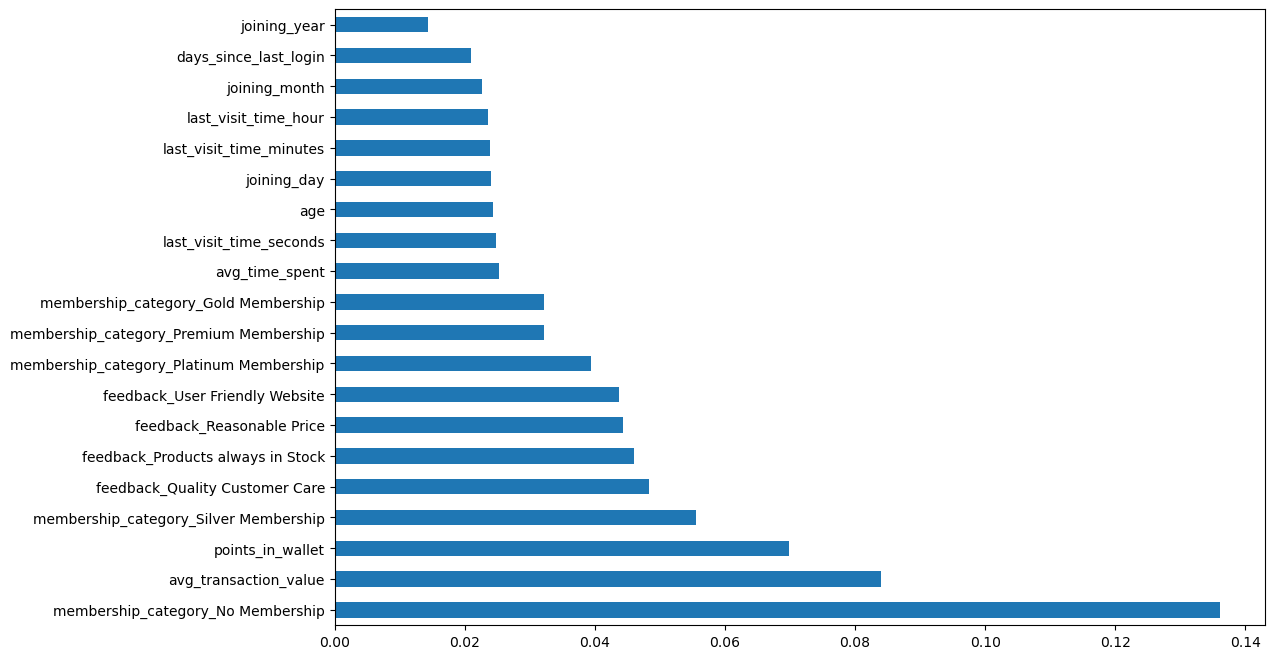

In [80]:
plt.figure(figsize = (12,8))
feat_importances = pd.Series(selection.feature_importances_, index=x.columns)
feat_importances.nlargest(20).plot(kind='barh')
plt.show()

In [81]:
data_train.head()

,age,days_since_last_login,avg_time_spent,avg_transaction_value,points_in_wallet,churn_risk_score,joining_day,joining_month,joining_year,last_visit_time_hour,...,offer_application_preference_Yes,past_complaint_Yes,feedback_Poor Customer Service,feedback_Poor Product Quality,feedback_Poor Website,feedback_Products always in Stock,feedback_Quality Customer Care,feedback_Reasonable Price,feedback_Too many ads,feedback_User Friendly Website
0,18,17,300.63,53005.25,781.750000,2,17,8,2017,16,...,True,False,False,False,False,True,False,False,False,False
1,32,16,306.34,12838.38,686.882199,1,28,8,2017,12,...,False,True,False,False,False,False,True,False,False,False
2,44,14,516.16,21027.00,500.690000,5,11,11,2016,22,...,True,True,False,False,True,False,False,False,False,False
3,37,11,53.27,25239.56,567.660000,5,29,10,2016,15,...,True,True,False,False,True,False,False,False,False,False
4,31,20,113.13,24483.66,663.060000,5,12,9,2017,15,...,True,True,False,False,True,False,False,False,False,False


In [82]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.2, random_state = 42)

In [83]:
x_train.head()

,age,days_since_last_login,avg_time_spent,avg_transaction_value,points_in_wallet,joining_day,joining_month,joining_year,last_visit_time_hour,last_visit_time_minutes,...,offer_application_preference_Yes,past_complaint_Yes,feedback_Poor Customer Service,feedback_Poor Product Quality,feedback_Poor Website,feedback_Products always in Stock,feedback_Quality Customer Care,feedback_Reasonable Price,feedback_Too many ads,feedback_User Friendly Website
3313,49,2,572.770000,19641.41,600.540000,26,3,2015,7,26,...,True,True,False,False,False,False,False,False,True,False
28260,42,16,1427.643434,48511.87,700.920000,2,10,2015,11,43,...,True,True,True,False,False,False,False,False,False,False
31412,10,-999,-779.419727,46612.57,744.650000,8,4,2016,2,41,...,True,True,False,False,False,False,False,False,True,False
6700,12,9,245.010000,95291.95,686.882199,23,2,2016,15,29,...,False,True,False,False,False,False,False,True,False,False
31958,28,14,308.770000,45564.89,716.280000,2,1,2017,10,59,...,False,True,False,False,True,False,False,False,False,False


In [84]:
x_train.shape

(29593, 40)

In [85]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
rf.fit(x_train, y_train)

C:\Users\KIIT\anaconda3\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


RandomForestClassifier()

In [86]:
print("training accuracy is : ", rf.score(x_train, y_train)*100)

training accuracy is :  99.9966208224918


In [87]:
print("testing accuracy is : ", rf.score(x_test, y_test)*100)

testing accuracy is :  74.61819164751994


In [88]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier()
model.fit(x_train, y_train)

DecisionTreeClassifier()

In [89]:
print("testing accuracy is : ", model.score(x_test, y_test)*100)

testing accuracy is :  70.83389647249628


In [90]:
pip install xgboost

Note: you may need to restart the kernel to use updated packages.


In [91]:
from xgboost import XGBClassifier
xg=XGBClassifier(objective='binary:logistic')
xg.fit(x_train, y_train)

ValueError: Invalid classes inferred from unique values of `y`.  Expected: [0 1 2 3 4 5], got [-1  1  2  3  4  5]

In [93]:
np.unique(y_train)


array([-1,  1,  2,  3,  4,  5], dtype=int64)

In [94]:
y_train_adjusted = np.where(y_train == -1, 0, y_train)

In [95]:
print(np.unique(y_train_adjusted))

[0 1 2 3 4 5]


In [96]:
from xgboost import XGBClassifier

xg = XGBClassifier(objective='binary:logistic')
xg.fit(x_train, y_train_adjusted)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, objective='multi:softprob', ...)

In [97]:
print("testing accuracy is : ", xg.score(x_test, y_test)*100)

testing accuracy is :  74.9695904852007


In [98]:
from sklearn.model_selection import RandomizedSearchCV

In [99]:
param_grid = {
    'learning_rate' : [1,0.5,0.1,0.01],
    'max_depth' : [3,5,10,20],
    'n_estimators' : [10,50,100,200]
}

In [100]:
grid = RandomizedSearchCV(XGBClassifier(objective='binary:logistic'),param_grid,verbose=3)

In [102]:
grid.fit(x_train,y_train_adjusted)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV 1/5] END learning_rate=0.01, max_depth=3, n_estimators=10;, score=0.683 total time=   0.2s
[CV 2/5] END learning_rate=0.01, max_depth=3, n_estimators=10;, score=0.689 total time=   0.1s
[CV 3/5] END learning_rate=0.01, max_depth=3, n_estimators=10;, score=0.695 total time=   0.1s
[CV 4/5] END learning_rate=0.01, max_depth=3, n_estimators=10;, score=0.663 total time=   0.1s
[CV 5/5] END learning_rate=0.01, max_depth=3, n_estimators=10;, score=0.678 total time=   0.1s
[CV 1/5] END learning_rate=0.01, max_depth=3, n_estimators=200;, score=0.704 total time=   1.5s
[CV 2/5] END learning_rate=0.01, max_depth=3, n_estimators=200;, score=0.700 total time=   1.6s
[CV 3/5] END learning_rate=0.01, max_depth=3, n_estimators=200;, score=0.706 total time=   1.5s
[CV 4/5] END learning_rate=0.01, max_depth=3, n_estimators=200;, score=0.706 total time=   1.6s
[CV 5/5] END learning_rate=0.01, max_depth=3, n_estimators=200;, score=0.712 tot

RandomizedSearchCV(estimator=XGBClassifier(base_score=None, booster=None,
                                           callbacks=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None, device=None,
                                           early_stopping_rounds=None,
                                           enable_categorical=False,
                                           eval_metric=None, feature_types=None,
                                           gamma=None, grow_policy=None,
                                           importance_type=None,
                                           interaction_constraints=None,
                                           learning_rate=None...
                                           max_cat_to_onehot=None,
                                           max_delta_step=None, max_depth=None,
                                           max_leaves=None,
                                           min_child_weight=None, missing=nan,
                                           monotone_constraints=None,
                                           multi_strategy=None,
                                           n_estimators=None, n_jobs=None,
                                           num_parallel_tree=None,
                                           random_state=None, ...),
                   param_distributions={'learning_rate': [1, 0.5, 0.1, 0.01],
                                        'max_depth': [3, 5, 10, 20],
                                        'n_estimators': [10, 50, 100, 200]},
                   verbose=3)

In [103]:
grid.best_params_

{'n_estimators': 100, 'max_depth': 3, 'learning_rate': 0.1}

In [104]:
xg = XGBClassifier(n_estimators= 100, max_depth= 3, learning_rate= 0.1)
xg.fit(x_train, y_train_adjusted)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=3, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=100, n_jobs=None,
              num_parallel_tree=None, objective='multi:softprob', ...)

In [105]:
print("testing accuracy is : ", xg.score(x_test, y_test)*100)

testing accuracy is :  75.69941884038384


In [106]:
#save model
import pickle
file = 'xgboost_model.pkl'
pickle.dump(xg, open(file, 'wb'))

In [107]:
load_model = pickle.load(open(file, 'rb'))

In [108]:
y_prep = load_model.predict(x_test)

In [109]:
y_prep

array([1, 4, 5, ..., 3, 3, 4], dtype=int64)

In [111]:
y_prep[3]

3